# Projeto - Aprendizado de Máquina
## Grupo 7

- Breno Rodrigues (bor)

## Metodologia de Teste
- Serão feitos testes de duas formas:
 1. Colunas de features com valores brutos
 2. Colunas de features com valores normalizados

- Otimizar e selecionar os hiperparâmetros
  - Métricas de acerto:
    Nosso palpite é recall_score, mas talvez seja interessante testar as outras métricas

## Links úteis
  - [Dataset Images](http://www.cs.wisc.edu/~street/images/)
  - [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
  - [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html)
  - [Precision Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
  - [Recall Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

  - Modelos:
    1. [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
    2. [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
    3. [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
    4. [K Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)



### Imports

In [1]:
import os
#from google.colab import drive
import pandas as pd
import numpy as np
import optuna as opt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

c:\Users\lider\anaconda3\envs\ML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Dataset Info

In [2]:
#drive.mount('/content/drive')
path = os.path.join('')

# Carregando detalhes do dataset
with open(f"{path}wdbc.names", "r") as file:
    print(file.read())

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

### Setup dataset

In [3]:
wdbcData = pd.read_csv(f'{path}wdbc.data', header=None)

# Droping the ID column (does not have any predictive power)
wdbcData.drop(wdbcData.columns[0], axis=1, inplace=True)

m = (wdbcData.iloc[:, 0] == 'M').sum()
b = (wdbcData.iloc[:, 0] == 'B').sum()

print(f'B = {b}')
print(f'M = {m}')

# Shuffling rows
wdbcData = wdbcData.sample(frac=1).reset_index(drop=True)

# Splitting data into train and test sets 60/40
trainData, testData = train_test_split(wdbcData, test_size=0.4)

# Splitting test data into validation and test sets 50/50
testData, validationData = train_test_split(testData, test_size=0.5)

# Separating Y response variable and X features
trainY, trainX = trainData.iloc[:, 0], trainData.iloc[:, 1:]
testY, testX = testData.iloc[:, 0], testData.iloc[:, 1:]
validationY, validationX = validationData.iloc[:, 0], validationData.iloc[:, 1:]

wdbcData.head()
#trainY.head()
#print(trainX.head())


B = 357
M = 212


,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,B,10.820,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,...,13.03,31.45,83.90,505.6,0.1204,0.1633,0.06194,0.03264,0.3059,0.07626
1,M,13.860,16.93,90.96,578.9,0.10260,0.15170,0.09901,0.05602,0.2106,...,15.75,26.93,104.40,750.1,0.1460,0.4370,0.46360,0.16540,0.3630,0.10590
2,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,...,7.93,19.54,50.41,185.2,0.1584,0.1202,0.00000,0.00000,0.2932,0.09382
3,B,12.760,13.37,82.29,504.1,0.08794,0.07948,0.04052,0.02548,0.1601,...,14.19,16.40,92.04,618.8,0.1194,0.2208,0.17690,0.08411,0.2564,0.08253
4,B,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,...,16.97,19.14,113.10,861.5,0.1235,0.2550,0.21140,0.12510,0.3153,0.08960


### Modelos

#### Decision Tree

[I 2023-07-13 13:57:57,879] A new study created in memory with name: no-name-5468208e-0ef4-4c28-8912-a0c6f9b45b33


Trial 0:
  max_depth = 11
  ccp_alpha = 0.1


[I 2023-07-13 13:57:58,245] Trial 0 finished with value: 0.9230769230769231 and parameters: {'max_depth': 11, 'ccp_alpha': 0.1}. Best is trial 0 with value: 0.9230769230769231.


Trial 1:
  max_depth = 26
  ccp_alpha = 0.1


[I 2023-07-13 13:57:58,689] Trial 1 finished with value: 0.9230769230769231 and parameters: {'max_depth': 26, 'ccp_alpha': 0.1}. Best is trial 0 with value: 0.9230769230769231.


Trial 2:
  max_depth = 23
  ccp_alpha = 0.1


[I 2023-07-13 13:57:59,025] Trial 2 finished with value: 0.9230769230769231 and parameters: {'max_depth': 23, 'ccp_alpha': 0.1}. Best is trial 0 with value: 0.9230769230769231.


Trial 3:
  max_depth = 17
  ccp_alpha = 0.5


[I 2023-07-13 13:57:59,330] Trial 3 finished with value: 0.8461538461538461 and parameters: {'max_depth': 17, 'ccp_alpha': 0.5}. Best is trial 0 with value: 0.9230769230769231.


Trial 4:
  max_depth = 14
  ccp_alpha = 0.0


[I 2023-07-13 13:57:59,987] Trial 4 finished with value: 0.9230769230769231 and parameters: {'max_depth': 14, 'ccp_alpha': 0.0}. Best is trial 0 with value: 0.9230769230769231.


Trial 5:
  max_depth = 28
  ccp_alpha = 0.5


[I 2023-07-13 13:58:00,297] Trial 5 finished with value: 0.8461538461538461 and parameters: {'max_depth': 28, 'ccp_alpha': 0.5}. Best is trial 0 with value: 0.9230769230769231.


Trial 6:
  max_depth = 12
  ccp_alpha = 0.0


[I 2023-07-13 13:58:00,996] Trial 6 finished with value: 0.9487179487179487 and parameters: {'max_depth': 12, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 7:
  max_depth = 11
  ccp_alpha = 0.0


[I 2023-07-13 13:58:01,602] Trial 7 finished with value: 0.9230769230769231 and parameters: {'max_depth': 11, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 8:
  max_depth = 27
  ccp_alpha = 0.0


[I 2023-07-13 13:58:02,265] Trial 8 finished with value: 0.9230769230769231 and parameters: {'max_depth': 27, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 9:
  max_depth = 30
  ccp_alpha = 0.0


[I 2023-07-13 13:58:02,909] Trial 9 finished with value: 0.9487179487179487 and parameters: {'max_depth': 30, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 10:
  max_depth = 20
  ccp_alpha = 0.0


[I 2023-07-13 13:58:03,549] Trial 10 finished with value: 0.9230769230769231 and parameters: {'max_depth': 20, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 11:
  max_depth = 19
  ccp_alpha = 0.0


[I 2023-07-13 13:58:04,153] Trial 11 finished with value: 0.9487179487179487 and parameters: {'max_depth': 19, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 12:
  max_depth = 30
  ccp_alpha = 0.0


[I 2023-07-13 13:58:04,776] Trial 12 finished with value: 0.9487179487179487 and parameters: {'max_depth': 30, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 13:
  max_depth = 23
  ccp_alpha = 0.0


[I 2023-07-13 13:58:05,362] Trial 13 finished with value: 0.9487179487179487 and parameters: {'max_depth': 23, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 14:
  max_depth = 14
  ccp_alpha = 0.0


[I 2023-07-13 13:58:05,946] Trial 14 finished with value: 0.9487179487179487 and parameters: {'max_depth': 14, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 15:
  max_depth = 24
  ccp_alpha = 0.5


[I 2023-07-13 13:58:06,233] Trial 15 finished with value: 0.8461538461538461 and parameters: {'max_depth': 24, 'ccp_alpha': 0.5}. Best is trial 6 with value: 0.9487179487179487.


Trial 16:
  max_depth = 16
  ccp_alpha = 0.0


[I 2023-07-13 13:58:06,875] Trial 16 finished with value: 0.9230769230769231 and parameters: {'max_depth': 16, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 17:
  max_depth = 10
  ccp_alpha = 0.0


[I 2023-07-13 13:58:07,509] Trial 17 finished with value: 0.9230769230769231 and parameters: {'max_depth': 10, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 18:
  max_depth = 21
  ccp_alpha = 0.5


[I 2023-07-13 13:58:07,908] Trial 18 finished with value: 0.8461538461538461 and parameters: {'max_depth': 21, 'ccp_alpha': 0.5}. Best is trial 6 with value: 0.9487179487179487.


Trial 19:
  max_depth = 30
  ccp_alpha = 0.1


[I 2023-07-13 13:58:08,228] Trial 19 finished with value: 0.9230769230769231 and parameters: {'max_depth': 30, 'ccp_alpha': 0.1}. Best is trial 6 with value: 0.9487179487179487.


Trial 20:
  max_depth = 13
  ccp_alpha = 0.0


[I 2023-07-13 13:58:08,897] Trial 20 finished with value: 0.9230769230769231 and parameters: {'max_depth': 13, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 21:
  max_depth = 18
  ccp_alpha = 0.0


[I 2023-07-13 13:58:09,575] Trial 21 finished with value: 0.9230769230769231 and parameters: {'max_depth': 18, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 22:
  max_depth = 19
  ccp_alpha = 0.0


[I 2023-07-13 13:58:10,203] Trial 22 finished with value: 0.9487179487179487 and parameters: {'max_depth': 19, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 23:
  max_depth = 22
  ccp_alpha = 0.0


[I 2023-07-13 13:58:10,818] Trial 23 finished with value: 0.9230769230769231 and parameters: {'max_depth': 22, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 24:
  max_depth = 25
  ccp_alpha = 0.0


[I 2023-07-13 13:58:11,437] Trial 24 finished with value: 0.9487179487179487 and parameters: {'max_depth': 25, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 25:
  max_depth = 15
  ccp_alpha = 0.0


[I 2023-07-13 13:58:12,081] Trial 25 finished with value: 0.9230769230769231 and parameters: {'max_depth': 15, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 26:
  max_depth = 12
  ccp_alpha = 0.0


[I 2023-07-13 13:58:12,744] Trial 26 finished with value: 0.9230769230769231 and parameters: {'max_depth': 12, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 27:
  max_depth = 17
  ccp_alpha = 0.0


[I 2023-07-13 13:58:13,360] Trial 27 finished with value: 0.9487179487179487 and parameters: {'max_depth': 17, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 28:
  max_depth = 20
  ccp_alpha = 0.5


[I 2023-07-13 13:58:13,667] Trial 28 finished with value: 0.8461538461538461 and parameters: {'max_depth': 20, 'ccp_alpha': 0.5}. Best is trial 6 with value: 0.9487179487179487.


Trial 29:
  max_depth = 12
  ccp_alpha = 0.1


[I 2023-07-13 13:58:14,014] Trial 29 finished with value: 0.9230769230769231 and parameters: {'max_depth': 12, 'ccp_alpha': 0.1}. Best is trial 6 with value: 0.9487179487179487.


Trial 30:
  max_depth = 28
  ccp_alpha = 0.1


[I 2023-07-13 13:58:14,361] Trial 30 finished with value: 0.9230769230769231 and parameters: {'max_depth': 28, 'ccp_alpha': 0.1}. Best is trial 6 with value: 0.9487179487179487.


Trial 31:
  max_depth = 30
  ccp_alpha = 0.0


[I 2023-07-13 13:58:15,017] Trial 31 finished with value: 0.9230769230769231 and parameters: {'max_depth': 30, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 32:
  max_depth = 29
  ccp_alpha = 0.0


[I 2023-07-13 13:58:15,767] Trial 32 finished with value: 0.9230769230769231 and parameters: {'max_depth': 29, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 33:
  max_depth = 26
  ccp_alpha = 0.0


[I 2023-07-13 13:58:16,464] Trial 33 finished with value: 0.9230769230769231 and parameters: {'max_depth': 26, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 34:
  max_depth = 26
  ccp_alpha = 0.0


[I 2023-07-13 13:58:17,155] Trial 34 finished with value: 0.9230769230769231 and parameters: {'max_depth': 26, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 35:
  max_depth = 29
  ccp_alpha = 0.1


[I 2023-07-13 13:58:17,557] Trial 35 finished with value: 0.9230769230769231 and parameters: {'max_depth': 29, 'ccp_alpha': 0.1}. Best is trial 6 with value: 0.9487179487179487.


Trial 36:
  max_depth = 24
  ccp_alpha = 0.0


[I 2023-07-13 13:58:18,211] Trial 36 finished with value: 0.9487179487179487 and parameters: {'max_depth': 24, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 37:
  max_depth = 28
  ccp_alpha = 0.5


[I 2023-07-13 13:58:18,538] Trial 37 finished with value: 0.8461538461538461 and parameters: {'max_depth': 28, 'ccp_alpha': 0.5}. Best is trial 6 with value: 0.9487179487179487.


Trial 38:
  max_depth = 18
  ccp_alpha = 0.0


[I 2023-07-13 13:58:19,150] Trial 38 finished with value: 0.9230769230769231 and parameters: {'max_depth': 18, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 39:
  max_depth = 27
  ccp_alpha = 0.0


[I 2023-07-13 13:58:19,871] Trial 39 finished with value: 0.9230769230769231 and parameters: {'max_depth': 27, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 40:
  max_depth = 10
  ccp_alpha = 0.0


[I 2023-07-13 13:58:20,967] Trial 40 finished with value: 0.9487179487179487 and parameters: {'max_depth': 10, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 41:
  max_depth = 24
  ccp_alpha = 0.0


[I 2023-07-13 13:58:22,019] Trial 41 finished with value: 0.9487179487179487 and parameters: {'max_depth': 24, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 42:
  max_depth = 23
  ccp_alpha = 0.0


[I 2023-07-13 13:58:23,145] Trial 42 finished with value: 0.9487179487179487 and parameters: {'max_depth': 23, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 43:
  max_depth = 22
  ccp_alpha = 0.0


[I 2023-07-13 13:58:24,215] Trial 43 finished with value: 0.9487179487179487 and parameters: {'max_depth': 22, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 44:
  max_depth = 30
  ccp_alpha = 0.0


[I 2023-07-13 13:58:25,252] Trial 44 finished with value: 0.9230769230769231 and parameters: {'max_depth': 30, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 45:
  max_depth = 16
  ccp_alpha = 0.0


[I 2023-07-13 13:58:26,335] Trial 45 finished with value: 0.9230769230769231 and parameters: {'max_depth': 16, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 46:
  max_depth = 21
  ccp_alpha = 0.5


[I 2023-07-13 13:58:26,848] Trial 46 finished with value: 0.8461538461538461 and parameters: {'max_depth': 21, 'ccp_alpha': 0.5}. Best is trial 6 with value: 0.9487179487179487.


Trial 47:
  max_depth = 27
  ccp_alpha = 0.1


[I 2023-07-13 13:58:27,429] Trial 47 finished with value: 0.9230769230769231 and parameters: {'max_depth': 27, 'ccp_alpha': 0.1}. Best is trial 6 with value: 0.9487179487179487.


Trial 48:
  max_depth = 29
  ccp_alpha = 0.0


[I 2023-07-13 13:58:28,542] Trial 48 finished with value: 0.9487179487179487 and parameters: {'max_depth': 29, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 49:
  max_depth = 15
  ccp_alpha = 0.0


[I 2023-07-13 13:58:29,704] Trial 49 finished with value: 0.9230769230769231 and parameters: {'max_depth': 15, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 50:
  max_depth = 19
  ccp_alpha = 0.0


[I 2023-07-13 13:58:30,694] Trial 50 finished with value: 0.9230769230769231 and parameters: {'max_depth': 19, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 51:
  max_depth = 13
  ccp_alpha = 0.0


[I 2023-07-13 13:58:31,740] Trial 51 finished with value: 0.9487179487179487 and parameters: {'max_depth': 13, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 52:
  max_depth = 11
  ccp_alpha = 0.0


[I 2023-07-13 13:58:32,790] Trial 52 finished with value: 0.9230769230769231 and parameters: {'max_depth': 11, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 53:
  max_depth = 12
  ccp_alpha = 0.0


[I 2023-07-13 13:58:33,910] Trial 53 finished with value: 0.9487179487179487 and parameters: {'max_depth': 12, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 54:
  max_depth = 14
  ccp_alpha = 0.0


[I 2023-07-13 13:58:35,139] Trial 54 finished with value: 0.9487179487179487 and parameters: {'max_depth': 14, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 55:
  max_depth = 14
  ccp_alpha = 0.0


[I 2023-07-13 13:58:36,207] Trial 55 finished with value: 0.9487179487179487 and parameters: {'max_depth': 14, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 56:
  max_depth = 10
  ccp_alpha = 0.5


[I 2023-07-13 13:58:36,702] Trial 56 finished with value: 0.8461538461538461 and parameters: {'max_depth': 10, 'ccp_alpha': 0.5}. Best is trial 6 with value: 0.9487179487179487.


Trial 57:
  max_depth = 25
  ccp_alpha = 0.0


[I 2023-07-13 13:58:37,748] Trial 57 finished with value: 0.9230769230769231 and parameters: {'max_depth': 25, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 58:
  max_depth = 13
  ccp_alpha = 0.0


[I 2023-07-13 13:58:38,872] Trial 58 finished with value: 0.9487179487179487 and parameters: {'max_depth': 13, 'ccp_alpha': 0.0}. Best is trial 6 with value: 0.9487179487179487.


Trial 59:
  max_depth = 17
  ccp_alpha = 0.1


[I 2023-07-13 13:58:39,442] Trial 59 finished with value: 0.9230769230769231 and parameters: {'max_depth': 17, 'ccp_alpha': 0.1}. Best is trial 6 with value: 0.9487179487179487.
C:\Users\lider\AppData\Local\Temp\ipykernel_20936\279593658.py:33: ExperimentalWarning: plot_timeline is experimental (supported from v3.2.0). The interface can change in the future.
  opt.visualization.matplotlib.plot_timeline(study)


<Axes: title={'center': 'Timeline Plot'}, xlabel='Datetime', ylabel='Trial'>

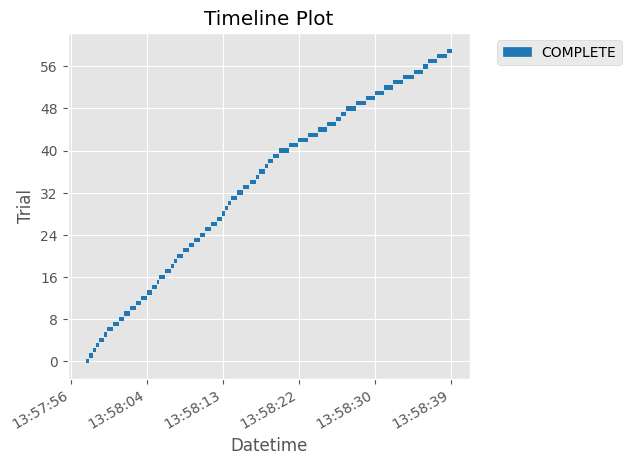

In [6]:
# Optimizing Classifier
def tree_optimizer(trial):
    # Setting up hyperparameters
    # Sugesting max_depth considering the number of features (10 features up to 30 if consider mean, se and worst)
    max_depth = trial.suggest_int("max_depth", 10, 30)
    # Sugesting ccp_alpha to not prune, or to prune real small values
    ccp_alpha = trial.suggest_categorical("ccp_alpha", [0.0, 0.1, 0.5])
    print(f'Trial {trial.number}:\n  max_depth = {max_depth}\n  ccp_alpha = {ccp_alpha}')
    classes = trainY.unique()

    plt.figure(figsize=(8, 6))
    decTree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, ccp_alpha=ccp_alpha)
    decTree = decTree.fit(trainX, trainY)
    plot_tree(decTree, class_names=classes, node_ids=True, filled=True, rounded=True)
    plt.savefig(f'{os.getcwd()}/trees/tree_{trial.number}.png', dpi=300)
    plt.clf()
    plt.close()

    # Predicting validation set
    predY = decTree.predict(testX)

    # Generating classification report
    report = classification_report(testY, predY, target_names=classes, output_dict=True)
    reportDF = pd.DataFrame(report).transpose()
    reportDF.to_csv(f'{os.getcwd()}/trees/report_{trial.number}.csv')

    # For this dataset, the metric to be optimized is the recall for the M class    
    return recall_score(testY, predY, pos_label='M')

# Creating Study
study = opt.create_study(direction="maximize")
study.optimize(tree_optimizer, n_trials=60)
opt.visualization.matplotlib.plot_timeline(study)

In [7]:
# Validating optimal model
plt.figure(figsize=(8, 6))
finalTree = DecisionTreeClassifier(criterion='entropy', max_depth=study.best_trial.params['max_depth'], ccp_alpha=study.best_trial.params['ccp_alpha'])
finalTree = finalTree.fit(trainX, trainY)

finalTreePredY = finalTree.predict(validationX)
classes = trainY.unique()

plot_tree(finalTree, class_names=classes, node_ids=True, filled=True, rounded=True)
plt.savefig(f'{os.getcwd()}/trees/final_tree_{study.best_trial.number}.png', dpi=300)
plt.clf()
plt.close()

# Generating classification report
report = classification_report(validationY, finalTreePredY, target_names=classes, output_dict=True)
reportDF = pd.DataFrame(report).transpose()
reportDF.to_csv(f'{os.getcwd()}/trees/final_report_{study.best_trial.number}.csv')

#### Naive Bayes

In [ ]:
# Classifier
nBayes = GaussianNB()
nBayes = nBayes.fit(trainX, trainY)

nBayes.score(testX, testY)

0.9181286549707602

#### Logistic Regression

In [ ]:
# Classifier

#### K-Neighbours

In [ ]:
# Classifier